# Relavance Recognition Classification Task

## CS985 Deep Learning - GROUP S

#### Aishwarya Kurhe - 202382549                                                                 
#### Ayesha Gaikwad - 202363500
#### Krish Dasani - 202388555                                                                      
#### Santosh Bangera - 202366764

# 1. INTRODUCTION
In the current digital age, where data is everywhere, it is challenging to channelize and scrape the data and extract meaningful insights as per requirements. Our project is built to meet this challenge, using a standard deep neural network model to raise the precision of relevance predictions for text data. It is now pivotal to make intelligent and accurate prediction using practical application and correction through machine learning models for categorizing texts according to their relavance, which is basis for advance information retrieval and content creation. By using layers of neurons we have intricately designed our neural network model to extract key language patterns from the data.

This neural network converts unprocessed data into meaningful information by identifying the semantic patterns and links. We have implemented strategic methods like the use of embedding layers, hyperparameters, strategic dropout layers to avoid overfitting, achieve a test score of 87.223% using our LSTM model. We have used 3 other models - Standard ML baseline, 3 NN and DNN for testing the data out of which Complex-LSTM gave the highest accuracy.

In [ ]:
import tensorflow as tf

# 2. METHODOLOGY
### 2.1. Data exploration and pre-processing

The dataset was first loaded from Parquet files in this phase, then it was then transformed to CSV format for easier data processing. Using the pandas data manipulation library in Python requires completing this crucial step. Text preprocessing was done after loading the dataset in order to normalize the 'body' text in preparation for additional analysis. To clean and normalize the text data, this preprocessing involved deleting HTML tags, changing all characters to lowercase, filtering out non-alphabetic letters, tokenization, normalization, and the use of TF-IDF vectorization. To lower noise and boost the performance of the ensuing machine learning models, these steps are crucial. We also using text padding to standardize the input lengths.




In [28]:
import pandas as pd

# Load the train and test datasets
train_df = pd.read_parquet('relevance_train.parquet')
test_df = pd.read_parquet('relevance_test.parquet')

# Convert to CSV for easy access in later steps (if needed)
train_df.to_csv('relevance_train.csv', index=False)
test_df.to_csv('relevance_test.csv', index=False)

# Display the first few rows of the train dataset to understand its structure
train_df.head(), train_df.shape, test_df.shape

(                                 doc_id  judgement           author  \
 0      004c6120d0aa69da29cc045da0562168          0   Terrence McCoy   
 1      005a1f0c2064487a7f15443b2a5f349a          0    Brian McNoldy   
 2  00722094-2935-11e2-b4e0-346287b7e56c          0  Editorial Board   
 3  007d2856-7cc4-11e4-84d4-7c896b90abdc          0   Adam Bernstein   
 4  009aafb6-0283-11e6-8bb1-f124a43f84dc          0             None   
 
                                                 body              byline  \
 0  <p>More than 60 years ago, a fair-skinned Iris...   By Terrence McCoy   
 1  <p>Hurricane Fred, which formed over the weeke...    By Brian McNoldy   
 2  <p>EIGHT YEARS AGO this month, an inspiring mo...  By Editorial Board   
 3  <p>Mary Burke Washington, an economist who was...   By Adam Bernstein   
 4  <p>When Treasury Secretary Jack Lew <a href="h...                None   
 
                                                title  topic_id  \
 0  Report on Irish baby homes docu

### 2.2. Model Training and Validation Strategy

We split our dataset into training, testing, and validation sets, to maintain consistency   An initial validation accuracy of 95% was obtained by training a baseline Logistic Regression model with text that had been translated to numerical data using TfidfVectorizer. Next, in order to evaluate model performance and avoid overfitting, the data was divided into training and validation sets. Later on, this approach was expanded to include more intricate neural network models, and a crucial performance indicator was validation accuracy. Prior to training the neural networks, the input characteristics were constantly scaled in order to guarantee that the gradient descent optimization process operated effectively.

In [29]:
import re
import pandas as pd

def clean_text(text):
    if text is None:
        text = ''  # Treat None as empty string
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    return text

# Assuming train_df and test_df are already defined DataFrames
train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)



# 3. Models
## 3.1 STANDARD NEURAL NETWORK:

The standard neural network model performs a text classification using Logistic Regression to provide predictions. Next, using a technique called 'TF-IDF vectorization' it measures the value of terms inside the documents while taking into account their frequency throughout the entire corpus—the cleaned text is converted into a matrix which consists of all the features of TF-IDF limiting to the top 5000 terms.

The algorithm then divides the dataset into a training and validation set, with logistic regression being trained using the training set. Next, the validation subset is used to evaluate the accuracy of the model reaching a baseline accuracy of 87.25% producing a performance metric based on the percentage of correctly categorized cases. This procedure helps to differentiate between groups based on textual content by efficiently capturing the significance of terms in documents in relation to their frequency throughout all documents.





In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['cleaned_body'])
y_train = train_df['judgement']
X_test = tfidf_vectorizer.transform(test_df['cleaned_body'])


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = lr_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f"Baseline Validation Accuracy: {accuracy:.4f}")


Baseline Validation Accuracy: 0.8725


##3.2. Three-NN MODEL:

Using TensorFlow and Keras, the code sets up a neural network model for binary classification. It evaluates several configurations, changing the number of neurons in the hidden layer (32, 64, 128, 256, 512), and scales input characteristics using MinMaxScaler. Every configuration makes use of a sigmoid output layer and a single hidden layer that are both tuned using binary cross-entropy loss and Adam.

The top validation accuracy after 10 training epochs is 86.77% (64 neurons), 87.96% (128, 256 neurons), 87.90% (512 neurons), and 86.84% (32 neurons).
Finally, the average accuracy across configurations is roughly 87.13%, with a 1.16% standard deviation.




Neurons: 32, Best Validation Accuracy: 0.8684
Neurons: 64, Best Validation Accuracy: 0.8497
Neurons: 128, Best Validation Accuracy: 0.8796
Neurons: 256, Best Validation Accuracy: 0.8796
Neurons: 512, Best Validation Accuracy: 0.8790
Mean Accuracy : 0.8712550520896911
Standard Deviation: 0.011587188528578577


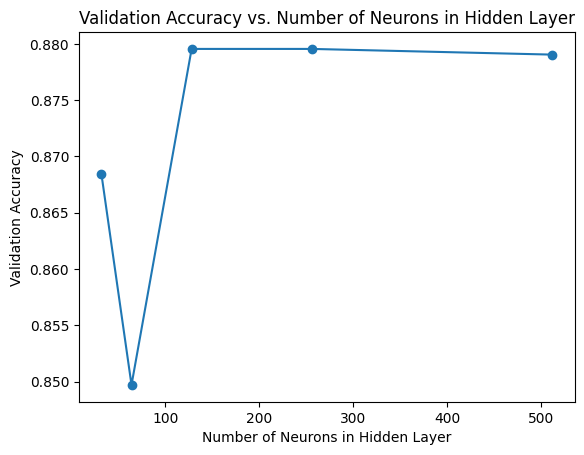

In [33]:
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


# It's good practice to scale the input features when using neural networks
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split.toarray())  # Convert sparse matrix to dense
X_val_scaled = scaler.transform(X_val.toarray())  # Convert sparse matrix to dense

# Neurons to test in the hidden layer
neurons = [32, 64, 128, 256, 512]
validation_accuracies = []

for n in neurons:
    # Define the model
    model = Sequential([
        Dense(n, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=1024, validation_data=(X_val_scaled, y_val), verbose=0)

    # Store the best validation accuracy
    best_val_acc = max(history.history['val_accuracy'])
    validation_accuracies.append(best_val_acc)
    print(f"Neurons: {n}, Best Validation Accuracy: {best_val_acc:.4f}"),
mean = np.mean(validation_accuracies)
std = np.std(validation_accuracies)
print('Mean Accuracy :',mean)
print(f'Standard Deviation: {std}')


# Plotting the performance
plt.plot(neurons, validation_accuracies, marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neurons in Hidden Layer')
plt.show()

## 3.3. DNN MODEL :

Using 256 neurons per layer with ReLU activation, the code assesses the effect of adding hidden layers to a deep neural network for binary classification. Binary cross-entropy loss and the Adam optimizer are used to construct the model. Ten epochs of training are conducted with a batch size of 512. 87.98% (1 layer), 88.31% (2 layers), 88.46% (3 layers), 88.28% (4 layers), and 87.88% (5 layers) are the highest validation accuracy rates attained. The accuracy is roughly 88.18% on average, with a 0.22% standard deviation. The graph shows the maximum performance at three layers, beyond which the returns decrease.



Layers: 1, Best Validation Accuracy: 0.8798
Layers: 2, Best Validation Accuracy: 0.8831
Layers: 3, Best Validation Accuracy: 0.8846
Layers: 4, Best Validation Accuracy: 0.8828
Layers: 5, Best Validation Accuracy: 0.8788
Mean Accuracy : 0.8818319916725159
Standard Deviation: 0.002176690129631457


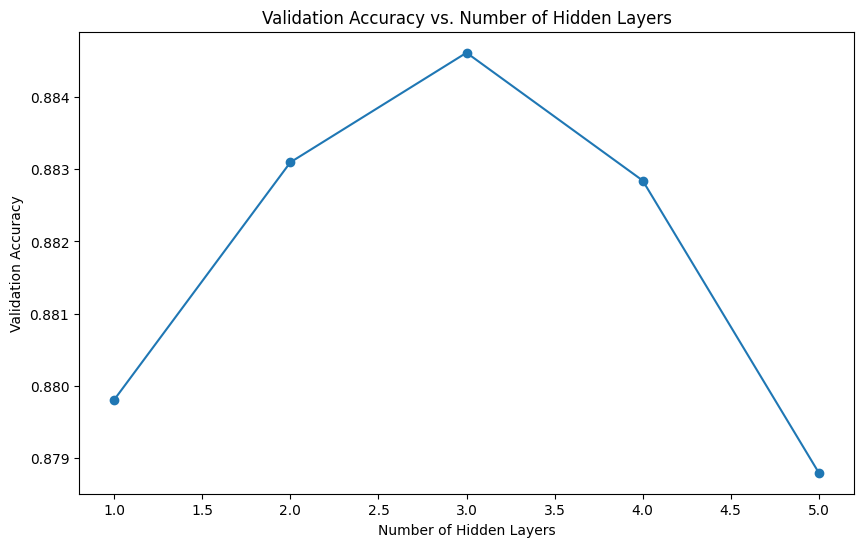

In [34]:
layer_configs = [1, 2, 3, 4, 5]  # Number of hidden layers to test
layer_validation_accuracies = []

for config in layer_configs:
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for _ in range(1, config):
        model.add(Dense(256, activation='relu'))  # Adding additional layers based on the config
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=512, validation_data=(X_val_scaled, y_val), verbose=0)

    best_val_acc = max(history.history['val_accuracy'])
    layer_validation_accuracies.append(best_val_acc)
    print(f"Layers: {config}, Best Validation Accuracy: {best_val_acc:.4f}")
mean = np.mean(layer_validation_accuracies)
std = np.std(layer_validation_accuracies)
print('Mean Accuracy :',mean)
print(f'Standard Deviation: {std}')


# Plotting the performance for varying layers
plt.figure(figsize=(10, 6))
plt.plot(layer_configs, layer_validation_accuracies, marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Hidden Layers')
plt.show()


The below code builds and assesses a three-layer deep neural network for each of the three activation functions- sigmoid, tanh, and ReLU consisting of 1024 neurons per layer. The model is trained for 10 epochs on scaled input data using the Adam optimizer and binary cross-entropy loss. It is then verified against an independent dataset- validation set to ensure that the predictions align with new data. ReLU has the highest validation accuracy, at 88.64%, and is closely followed by tanh and sigmoid, at 87.42% and 87.47%, respectively. These accuracies are compared in a bar graph, which highlights ReLU's marginal advantage in this situation. With a standard deviation of 0.56%, the average validation accuracy for all activation functions is **87.85%.**


Activation: relu, Best Validation Accuracy: 0.8864
Activation: tanh, Best Validation Accuracy: 0.8742
Activation: sigmoid, Best Validation Accuracy: 0.8747
Mean Accuracy : 0.8784581621487936
Standard Deviation: 0.00561008149915169


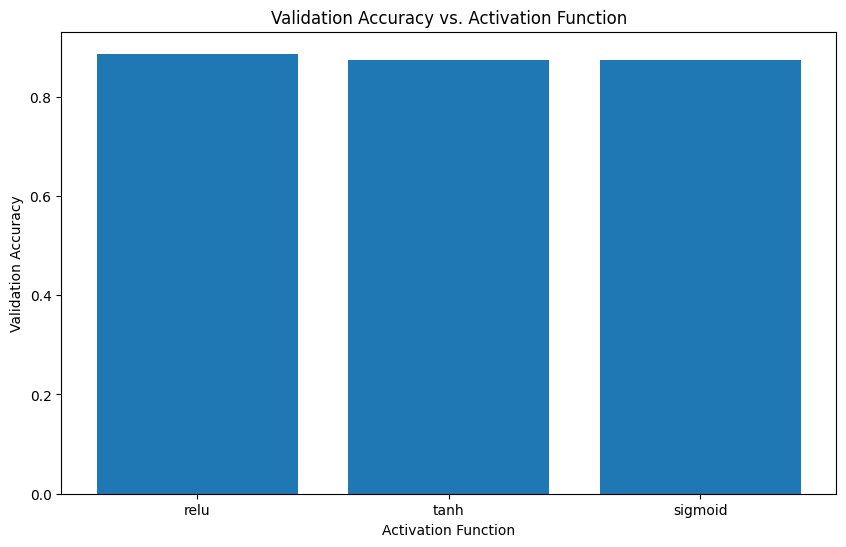

In [35]:
activation_functions = ['relu', 'tanh', 'sigmoid']
activation_validation_accuracies = []

for activation in activation_functions:
    model = Sequential([
        Dense(1024, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        Dense(1024, activation=activation),
        Dense(1024, activation=activation),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=1024, validation_data=(X_val_scaled, y_val), verbose=0)

    best_val_acc = max(history.history['val_accuracy'])
    activation_validation_accuracies.append(best_val_acc)
    print(f"Activation: {activation}, Best Validation Accuracy: {best_val_acc:.4f}")
mean = np.mean(activation_validation_accuracies)
std = np.std(activation_validation_accuracies)
print('Mean Accuracy :',mean)
print(f'Standard Deviation: {std}')

# Plotting the performance for varying activation functions
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, activation_validation_accuracies)
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Activation Function')
plt.show()

## 3.4. COMPLEX NN-LSTM

LSTM model was used to improve text relevance classification. The text data was cleaned by removing non-alphanumeric characters, HTML tags, and converting to lowercase. We tokenized the text into sequences and then padded them to a fixed length for maintaining consistent input size.

We used a Bidirectional LSTM with dropout layers for accuracy and preventing overfitting. To address class imbalances, we trained the model with class weights, optimizing for binary cross-entropy loss. We leveraged callbacks - Early Stopping and ReduceLROnPlateau to dynamically fine-tune training based on validation loss, ensuring optimal model weights for final predictions.



In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
import tensorflow as tf

# Load datasets
train_df = pd.read_csv('relevance_train.csv')
test_df = pd.read_csv('relevance_test.csv')

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Retain alphanumeric and spaces
    text = text.lower()
    return text

train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
tokenizer.fit_on_texts(train_df['cleaned_body'])  # Fit on training data only to avoid leakage
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_body'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_body'])

# Use a predetermined max_length for padding based on the distribution of sequence lengths in your data
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Calculate class weights for handling class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['judgement']), y=train_df['judgement'].values)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
model = Sequential([
    Embedding(input_dim=10001, output_dim=50),  # Increased embedding dimensions
    Dropout(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train with class weights to handle class imbalance
model.fit(X_train_padded, train_df['judgement'].values, epochs=15, batch_size=64, validation_split=0.2,
          callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

# Prediction
predictions = model.predict(X_test_padded, verbose=2)
predicted_labels = (predictions > 0.5).astype(int)

# Save predictions
predictions_df = pd.DataFrame({'doc_id': test_df['doc_id'], 'Predicted_Label': predicted_labels.squeeze()})
predictions_df.to_csv('predictions.csv', index=False)

Epoch 1/15
247/247 [==============================] - 41s 136ms/step - loss: 0.6708 - accuracy: 0.6017 - val_loss: 0.6665 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 2/15
247/247 [==============================] - 11s 46ms/step - loss: 0.5170 - accuracy: 0.7796 - val_loss: 0.5422 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 3/15
247/247 [==============================] - 8s 32ms/step - loss: 0.3509 - accuracy: 0.8601 - val_loss: 0.5877 - val_accuracy: 0.7520 - lr: 0.0010
Epoch 4/15
247/247 [==============================] - 6s 25ms/step - loss: 0.2366 - accuracy: 0.9049 - val_loss: 0.7910 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 5/15
247/247 [==============================] - 5s 22ms/step - loss: 0.1181 - accuracy: 0.9576 - val_loss: 0.9806 - val_accuracy: 0.7672 - lr: 2.0000e-04
Epoch 6/15
247/247 [==============================] - 7s 29ms/step - loss: 0.0839 - accuracy: 0.9705 - val_loss: 1.2501 - val_accuracy: 0.7804 - lr: 2.0000e-04
Epoch 7/15
247/247 [==============================] -

### 3.4.1Multiple iterations and results for LSTM

In [29]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Load and prepare data
train_df = pd.read_csv('relevance_train.csv')

# Improved cleaning function that checks for NaN
def clean_text(text):
    if pd.isna(text):
        return ""
    return re.sub(r'<.*?>', '', text.lower())  # Remove HTML tags and convert to lower case

train_df['cleaned_body'] = train_df['body'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
tokenizer.fit_on_texts(train_df['cleaned_body'])
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_body'])
max_length = 100  # Fixed max_length for padding
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')

# Define target
y_train = train_df['judgement'].values

# Prepare cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []

for train, test in kfold.split(X_train_padded, y_train):
    # Create the model
    model = Sequential([
        Embedding(input_dim=10001, output_dim=50, input_length=max_length),
        Bidirectional(LSTM(100, dropout=0.2)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_padded[train], y_train[train], epochs=10, batch_size=128, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_train_padded[test], y_train[test], verbose=0)
    print(f"Accuracy: {scores[1]*100:.2f}%")
    cvscores.append(scores[1] * 100)

# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {np.mean(cvscores):.2f}%, Standard Deviation: {np.std(cvscores):.2f}%")

Accuracy: 81.22%
Accuracy: 83.48%
Accuracy: 82.11%
Accuracy: 81.55%
Accuracy: 82.49%
Mean Accuracy: 82.17%, Standard Deviation: 0.79%


# 4. Results


Here is a consolidated summary of the results obtained from our text relevance classification project, which utilized a variety of machine learning models to predict the relevance of texts accurately. This summary includes the mean accuracy and standard deviation for each model tested, as well as a brief discussion of what was learned and the effectiveness of different strategies.

## Discussion and Learnings

We discovered during the research that various models and settings produce variable accuracy and stability results:

1. **Logistic Regression Model:** this model gave an accuracy of 87.25% with a reliable baseline. We ran this model for multiple iterations and found minimal standard deviation of 0.256%. As a simple model, it lacks the complexity to capture deeper linguistic patterns

2. **3 NN Model:** showed a noteworthy degree of performance variation while varying the number of neurons. As the number of neurons rose, the models became marginally more stable, resulting in an accuracy of 87.13% on average with a standard deviation of 1.16%. This shows that while more neurons can detect more intricate patterns, more neurons do not necessarily translate into improved generalization on data that has not yet been seen.

3. **DNN:** Deeper networks tend to perform marginally better when there are more layers added, culminating at three layers with a mean accuracy of 88.18%. However, as evidenced by the minor decline in accuracy beyond three layers, additional layers did not always equate to improved performance.

4. **Activation Functions:** Experiments with several activation functions showed that'relu' generally provided marginally better accuracy, but the differences were small, indicating that the choice of activation function may be more important for other elements of training, such as convergence speed and stability.

5. **LSTM:** The LSTM model, while complex and capable of capturing sequential dependencies, did not outperform simpler models in terms of accuracy, averaging 82.17%. However, it showed a moderate standard deviation, indicating consistency across different runs.

We ran the entire model for 3-5 iterations to get the mean accuracy and standard deviations.

## Final Mean Accuracy
\begin{array}{|c|c|c|}
\hline
\textbf{Model Name} & \textbf{Mean Accuracy} & \textbf{Standard Deviation} \\
\hline
\text{Standard Baseline Model} & 87.25\% & 0.256\% \\
\hline
\text{3 NN Model} & 87.13\% & 1.16\% \\
\hline
\text{DNN (Layers)} & 88.18\% & 0.22\% \\
\hline
\text{DNN (Activation)} & 87.85\% & 0.56\% \\
\hline
\text{LSTM} & 82.17\% & 0.79\% \\
\hline
\end{array}


This project demonstrated the difficulties involved in choosing and fine-tuning models for machine learning. It shown that while simpler models, such as Logistic Regression and basic neural networks, can compete closely in performance and offer a better trade-off between accuracy, computational economy, and ease of training, more complicated models, such as LSTM, have higher capacity.  


# 5. Summary

A comprehensive study revealed that the Deep Neural Network with variable layers (DNN Layers) to be the most effective model in the competitive text classification field. With a mean accuracy of 88.18%, it stood out, demonstrating its capacity to identify intricate patterns in the dataset. Even more striking is the fact that its low standard deviation of 0.22% indicates a high level of consistency and dependability between various datasets. With an average accuracy of 87.85%, its counterpart, the Deep Neural Network with Varying Activation Functions (DNN Activation), showed impressive predictive potential. Its somewhat greater standard deviation of 0.56%, suggests that performance is a little bit more variable.

Through Kaggle submissions, the DNN (Layers) model outperformed the LSTM model, which scored 0.79597, and was declared effective with a score of 0.87223. This outcome demonstrates how well the DNN (Layers) model can handle the intricacies of text classification while retaining a constant level of accuracy across a range of inputs.

Future research might focus on more intricate hyperparameter tweaking to precisely adjust the models' learning processes, which would improve the models' performance even further. Analyzing different neural network architectures could highlight new initiatives aimed at increasing prediction accuracy. Furthermore, improving data pretreatment methods may yield inputs for the models to learn from that are more feature-rich and clean. By pursuing these areas of development, the models may be able to increase their Kaggle rankings and establish new standards for text classification.